In [ ]:
pip install scikit-surprise

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import pandas as pd

In [7]:
df_books_org = pd.read_csv("/home/moshtasa/Research/phd-svd-recsys/SVD/Book/data/goodbooks-10k/books.csv")

In [8]:
df_books_org

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,11279,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...


In [30]:
df_final = pd.read_csv("/home/moshtasa/Research/phd-svd-recsys/SVD/Book/data/df_final.csv")

In [31]:
df_final.groupby('decade')['book_id'].count().unique

<bound method Series.unique of decade
1920               77298
1930              121695
1940              133772
1950              254674
1960              249719
1970              244194
1980              443368
1990              847948
2000             1808808
2010             1268418
Ancient Books     520643
Not Available       5942
Name: book_id, dtype: int64>

In [32]:
df_final.groupby('decade')['book_id'].nunique()

decade
1920               89
1930              121
1940              155
1950              210
1960              272
1970              400
1980              704
1990             1360
2000             3121
2010             3067
Ancient Books     480
Not Available      21
Name: book_id, dtype: int64

In [33]:
df_final['rating'].describe()

count    5.976479e+06
mean     3.919866e+00
std      9.910868e-01
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [35]:
df_final.columns

Index(['user_id', 'book_id', 'rating', 'decade'], dtype='object')

In [34]:
df_final

,user_id,book_id,rating,decade
0,1,258,5,2000
1,2,4081,4,2000
2,2,260,5,1930
3,2,9296,5,1970
4,2,2318,3,1990
...,...,...,...,...
5976474,49925,510,5,1990
5976475,49925,528,4,1990
5976476,49925,722,4,1990
5976477,49925,949,5,1990


In [ ]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
import csv
import os

# ---------------------
# Load dataset
# ---------------------
df_final 

# Optional: Convert user_id and book_id to strings (Surprise handles strings better)
df_final['user_id'] = df_final['user_id'].astype(str)
df_final['book_id'] = df_final['book_id'].astype(str)

# ---------------------
# Prepare Surprise Dataset
# ---------------------
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_final[['user_id', 'book_id', 'rating']], reader)

# Split into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# ---------------------
# Train SVD model
# ---------------------
svd = SVD(n_factors=100, random_state=42)
svd.fit(trainset)

# ---------------------
# Evaluate RMSE
# ---------------------
predictions = svd.test(testset)
rmse = accuracy.rmse(predictions)
# ---------------------
# Generate Top-25 Recommendations per User
# ---------------------
all_user_ids = df_final['user_id'].unique()
all_book_ids = df_final['book_id'].unique()

user_recommendations = {}

print("Generating recommendations...")
for i, user_id in enumerate(all_user_ids):
    rated_books = df_final[df_final['user_id'] == user_id]['book_id'].tolist()
    unseen_books = [book for book in all_book_ids if book not in rated_books]
    
    preds = [(book, svd.predict(user_id, book).est) for book in unseen_books]
    top_preds = sorted(preds, key=lambda x: x[1], reverse=True)[:25]
    
    user_recommendations[user_id] = [book for book, _ in top_preds]
    
    if i % 500 == 0:
        print(f"Processed {i}/{len(all_user_ids)} users")

# ---------------------
# Save Recommendations to CSV
# ---------------------
with open('user_recommendations.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['user_id', 'recommended_books'])
    for user_id, books in user_recommendations.items():
        writer.writerow([user_id, ','.join(map(str, books))])

# ---------------------
# Save RMSE to a text file
# ---------------------
with open('svd_rmse.txt', 'w') as f:
    f.write(f"RMSE: {rmse:.4f}\n")

# ---------------------
# Optional: Load and display a preview
# ---------------------
df_recommendations = pd.read_csv('user_recommendations.csv')
print("\nSample recommendations:")
print(df_recommendations.head())


RMSE: 0.8310
Generating recommendations...
Processed 0/53424 users
Processed 500/53424 users


✅ Unique book ID counts:
books.csv      : 9415
FLAN-T5        : 9415
Zero-shot      : 9415
GPT-3.5 (7764) : 7764

📊 Genre counts (Zero-shot vs FLAN-T5 vs GPT-3.5):

Adult           | Zero-shot:  4056 | FLAN-T5:   839 | GPT-3.5:   276
Adventure       | Zero-shot:   392 | FLAN-T5:   316 | GPT-3.5:  1467
Children's      | Zero-shot:   702 | FLAN-T5:  1159 | GPT-3.5:   711
Classics        | Zero-shot:   766 | FLAN-T5:   188 | GPT-3.5:   759
Drama           | Zero-shot:  1507 | FLAN-T5:  1284 | GPT-3.5:  2484
Fantasy         | Zero-shot:   759 | FLAN-T5:  1794 | GPT-3.5:  1755
Historical      | Zero-shot:  1714 | FLAN-T5:   957 | GPT-3.5:   707
Horror          | Zero-shot:  1250 | FLAN-T5:    48 | GPT-3.5:   663
Mystery         | Zero-shot:   393 | FLAN-T5:  1847 | GPT-3.5:  2088
Nonfiction      | Zero-shot:  4019 | FLAN-T5:  1988 | GPT-3.5:   867
Romance         | Zero-shot:   703 | FLAN-T5:  2028 | GPT-3.5:  1755
Science Fiction | Zero-shot:  2160 | FLAN-T5:  1023 | GPT-3.5:   698
Thrille

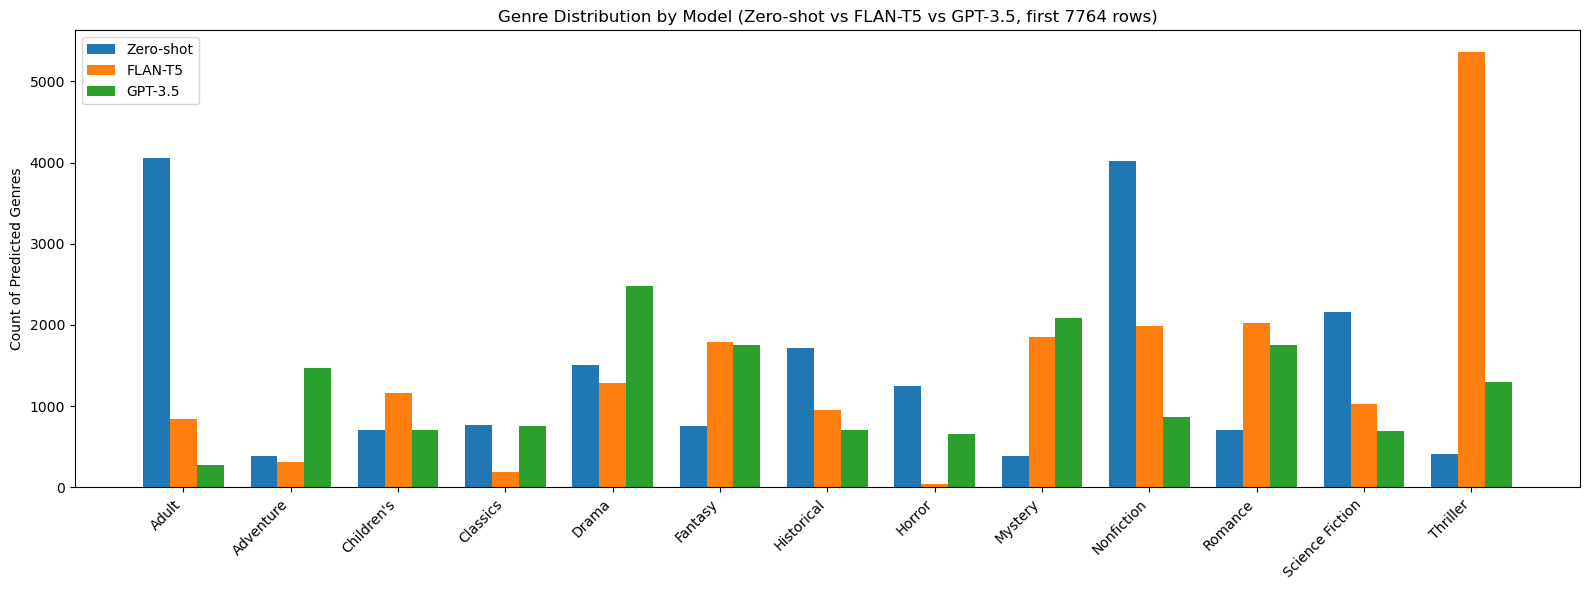